Model Evaluation Metrics:
R² Score: 0.7835929767120724
MAE: 4181.19447375365
MSE: 33596915.85136145
RMSE: 5796.284659276273

Feature Coefficients:
            Feature   Coefficient
0               age    256.975706
1               sex    -18.591692
2               bmi    337.092552
3          children    425.278784
4            smoker  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


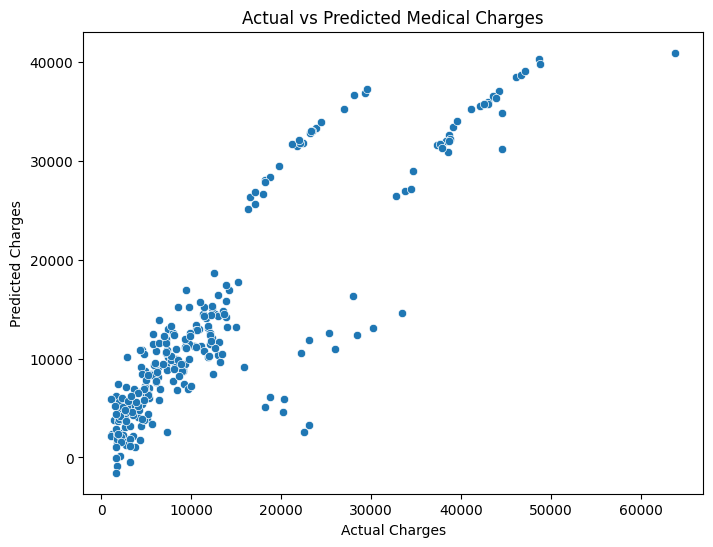

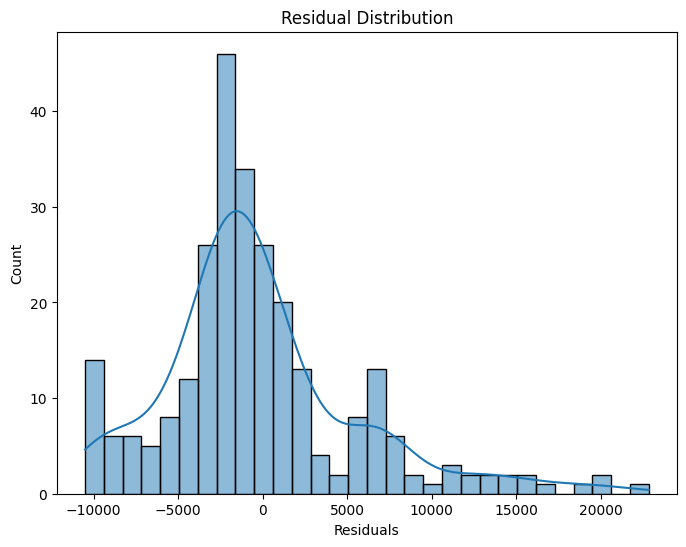

In [18]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2️⃣ Load dataset
df = pd.read_csv("insurance.csv")  # replace with your CSV path

# 3️⃣ Clean column names
df.columns = df.columns.str.strip()

# 4️⃣ Handle missing values
# Numeric columns: fill with mean
for col in ['age', 'bmi', 'children']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Categorical columns: fill with mode (before encoding)
for col in ['sex', 'smoker', 'region']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# 5️⃣ Encode categorical features
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

# One-hot encoding for region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# 6️⃣ Features & target
X = df.drop('charges', axis=1)
y = df['charges']

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8️⃣ Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 9️⃣ Predictions
y_pred = model.predict(X_test)

# 🔟 Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

# 1️⃣1️⃣ Feature Importance (Coefficients)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coeff_df)

# 1️⃣2️⃣ Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()

# 1️⃣3️⃣ Residual plot
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()
